Name: **Luong Nguyen**  
Student ID: **1504210**  

## Introduction to Deep Learning 

### Session02: Fashion-MNIST dataset
____

**Import the packages needed for this assignment**

In [76]:
# import packages
import numpy as np
import keras
import matplotlib.pyplot as plt

**Load data**

In [77]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**Explore data**

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

An example image


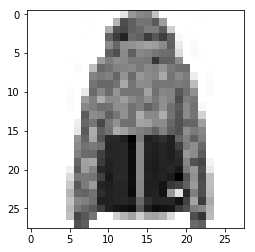

Corresponding label: 4


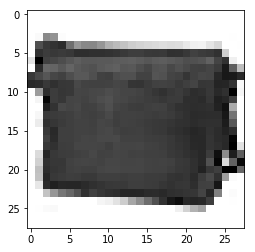

Corresponding label: 8


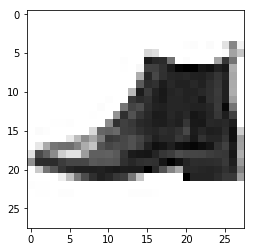

Corresponding label: 9


In [78]:
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

print("\nAn example image")
example_index = 22
example_image = x_train[example_index]
example_label = y_train[example_index]
plt.imshow(example_image, cmap=plt.cm.binary)
plt.show()
print("Corresponding label: %d" % (example_label))

plt.figure()
example_index = 12345
example_image = x_train[example_index]
example_label = y_train[example_index]
plt.imshow(example_image, cmap=plt.cm.binary)
plt.show()
print("Corresponding label: %d" % (example_label))

plt.figure()
example_index = 22222
example_image = x_train[example_index]
example_label = y_train[example_index]
plt.imshow(example_image, cmap=plt.cm.binary)
plt.show()
print("Corresponding label: %d" % (example_label))

**Preprocess data**

In [79]:
# unroll image into a vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# scaling all values into [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [80]:
# Data shape after preprocessing
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

print("\nA sample of y_train: %s" % (str(y_train[example_index])))

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)

A sample of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**Train with 1 layer network**

In [81]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [82]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.9704 - acc: 0.6985 - val_loss: 0.7483 - val_acc: 0.7470
Epoch 2/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.6741 - acc: 0.7834 - val_loss: 0.6555 - val_acc: 0.7784
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.6086 - acc: 0.8030 - val_loss: 0.6116 - val_acc: 0.7944
Epoch 4/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.5729 - acc: 0.8137 - val_loss: 0.5838 - val_acc: 0.8028
Epoch 5/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.5497 - acc: 0.8202 - val_loss: 0.5652 - val_acc: 0.8102
Epoch 6/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.5328 - acc: 0.8247 - val_loss: 0.5535 - val_acc: 0.8136
Epoch 7/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.5193 - acc: 0.8286 - val_loss: 0.5395 - val_acc

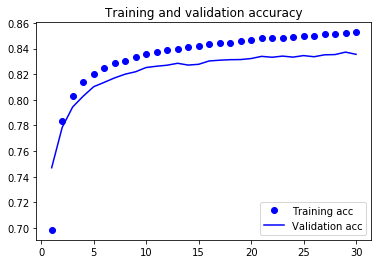

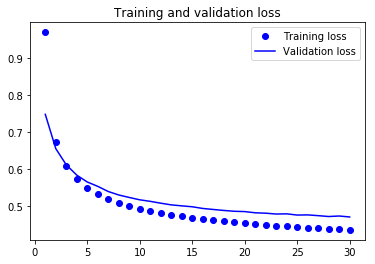

In [83]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

With this 1-layer network we reached ~83% accuracy.

**Train with deep network**

In [84]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_79 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_80 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.9043 - acc: 0.7111 - val_loss: 0.6476 - val_acc: 0.7741
Epoch 2/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.5729 - acc: 0.8069 - val_loss: 0.5587 - val_acc: 0.8060
Epoch 3/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.5083 - acc: 0.8254 - val_loss: 0.5420 - val_acc: 0.8086
Epoch 4/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.4753 - acc: 0.8353 - val_loss: 0.5010 - val_acc: 0.8231
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.4535 - acc: 0.8412 - val_loss: 0.4728 - val_acc: 0.8366
Epoch 6/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.4363 - acc: 0.8468 - val_loss: 0.4719 - val_acc: 0.8357
Epoch 7/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.4245 - acc: 0.8515 - val_loss: 0.4490 - val_acc

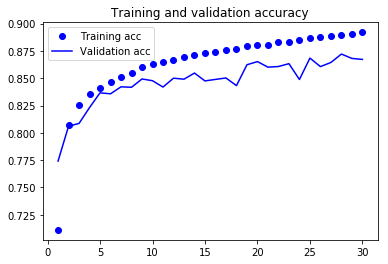

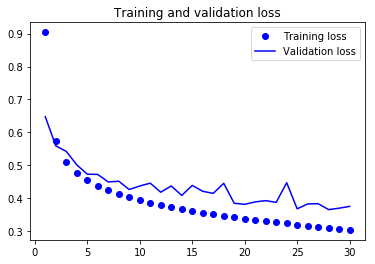

In [86]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

With this 3-layer network we reached ~86% accuracy.

**Train with a deeper network**

In [87]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_82 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_83 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_84 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_85 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_86 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_87 (Dense)             (None, 50)                2550      
__________

In [88]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 294us/step - loss: 1.5509 - acc: 0.4416 - val_loss: 0.7494 - val_acc: 0.7050
Epoch 2/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.6440 - acc: 0.7596 - val_loss: 0.5747 - val_acc: 0.7754
Epoch 3/15
60000/60000 [==============================] - 16s 271us/step - loss: 0.5211 - acc: 0.8145 - val_loss: 0.5832 - val_acc: 0.7905
Epoch 4/15
60000/60000 [==============================] - 17s 285us/step - loss: 0.4550 - acc: 0.8370 - val_loss: 0.4640 - val_acc: 0.8289
Epoch 5/15
60000/60000 [==============================] - 19s 313us/step - loss: 0.4105 - acc: 0.8525 - val_loss: 0.4331 - val_acc: 0.8429
Epoch 6/15
60000/60000 [==============================] - 18s 308us/step - loss: 0.3821 - acc: 0.8609 - val_loss: 0.4707 - val_acc: 0.8216
Epoch 7/15
60000/60000 [==============================] - 17s 288us/step - loss: 0.3585 - acc: 0.8709 - val_loss: 0.

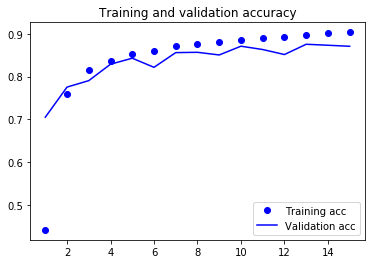

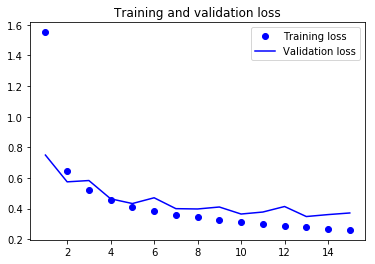

In [89]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

With this 10-layer network we reach ~87% accuracy, not so much improvement compare to the previous 3-layer network but took longer time to train.

**The accuracy we achieved on this dataset (~88%) is lower than on the traditional MNIST dataset (~98%).**